In [36]:
import sys
import pandas as pd
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt



In [37]:
dataset = pd.read_csv("unplugged.csv")
dataset.sample(frac=1)
dataset = dataset[0:360]
del dataset['Comments']
gender = {'M': 1, 'F': 2}
dataset.Gender = [gender[item] for item in dataset.Gender]

after = {'F': 0, 'P': 1}
dataset.Results_After   = [after[item] for item in dataset.Results_After]

before = {'F': 0, 'P': 1}
dataset.Results_Before   = [before[item] for item in dataset.Results_Before]

print(dataset.describe())

dataset =  dataset[['Age', 'Gender', 'Class', 'Results_Before', 'Results_After', 'Positive Outcomes']]

              Age      Gender  Results_Before  Results_After       Class
count  360.000000  360.000000      360.000000     360.000000  360.000000
mean     9.616667    1.630556        0.391667       0.752778    4.052778
std      1.287502    0.483326        0.488802       0.431997    0.619995
min      7.000000    1.000000        0.000000       0.000000    3.000000
25%      9.000000    1.000000        0.000000       1.000000    4.000000
50%     10.000000    2.000000        0.000000       1.000000    4.000000
75%     10.000000    2.000000        1.000000       1.000000    4.000000
max     14.000000    2.000000        1.000000       1.000000    5.000000


In [38]:
array = dataset.values
X = array[:,0:5]
Y = array[:,5:]
test_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, 
random_state=seed, stratify = dataset['Positive Outcomes'])

In [59]:
# Alpha: used for laplace smoothing
naiveBayes_classifier = MultinomialNB(alpha=0.00001)

naiveBayes_classifier.fit(X_train,Y_train.ravel())
accuracy_3 = naiveBayes_classifier.score(X_test,Y_test)


In [47]:
print (accuracy_3)

0.9861111111111112


In [48]:
models = []

models.append(('NaiveBayes', naiveBayes_classifier))
scoring = 'accuracy'
results = []
names = []


In [49]:
for name, model in models:
	kfold = sklearn.model_selection.KFold(n_splits=5,shuffle=False, random_state=None)
	cv_results = sklearn.model_selection.cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

NaiveBayes: 0.937568 (0.052133)


In [54]:
clf = naiveBayes_classifier
clf.fit(X_train, Y_train.ravel())
predictions = clf.predict(X_test)
print(accuracy_score(Y_test, predictions))
print (predictions)

0.9861111111111112
['T' 'T' 'F' 'T' 'F' 'T' 'F' 'T' 'F' 'T' 'F' 'T' 'F' 'F' 'F' 'T' 'T' 'T'
 'F' 'T' 'F' 'T' 'F' 'T' 'T' 'F' 'T' 'F' 'F' 'F' 'F' 'T' 'F' 'F' 'F' 'T'
 'T' 'F' 'T' 'T' 'F' 'T' 'T' 'F' 'F' 'T' 'T' 'F' 'F' 'F' 'T' 'F' 'T' 'F'
 'F' 'T' 'F' 'T' 'F' 'F' 'F' 'F' 'T' 'F' 'F' 'F' 'T' 'T' 'T' 'F' 'F' 'F']


In [51]:
cm = confusion_matrix(Y_test, predictions)
print (cm)

[[40  1]
 [ 0 31]]


AUC: 0.988


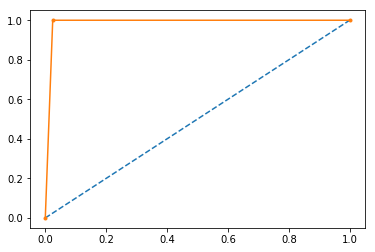

In [52]:
testy = []
probsy = []
probs = predictions[:]
for i in range(len(probs)):
    if (probs[i] == 'F'):
        probsy.append(0)
    else:
        probsy.append(1)
#     print(i)
for i in range(len(Y_test)):
    if (Y_test[i][0] == 'F'):
        testy.append(0)
    else:
        testy.append(1)
#     print (i)
# calculate AUC
auc = roc_auc_score(testy, probsy)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probsy)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [70]:

Age_7 = dataset.loc[dataset.Age == 7, 'Age'].count()
Age_8 = dataset.loc[dataset.Age == 8, 'Age'].count()
Age_9 = dataset.loc[dataset.Age == 9, 'Age'].count()
Age_10 = dataset.loc[dataset.Age == 10, 'Age'].count()
Age_11 = dataset.loc[dataset.Age == 11, 'Age'].count()
Age_12 = dataset.loc[dataset.Age == 12, 'Age'].count()
Age_13 = dataset.loc[dataset.Age == 13, 'Age'].count()
Age_14 = dataset.loc[dataset.Age == 14, 'Age'].count()

Age_10

99

In [69]:
P_Age_7 = Age_7 / (Age_7 + Age_8 + Age_9 + Age_10 + Age_11 + Age_12 + Age_13 + Age_14)
P_Age_8 = Age_8 / (Age_7 + Age_8 + Age_9 + Age_10 + Age_11 + Age_12 + Age_13 + Age_14)
P_Age_9 = Age_9 / (Age_7 + Age_8 + Age_9 + Age_10 + Age_11 + Age_12 + Age_13 + Age_14)
P_Age_10 = Age_10 / (Age_7 + Age_8 + Age_9 + Age_10 + Age_11 + Age_12 + Age_13 + Age_14)
P_Age_11 = Age_11 / (Age_7 + Age_8 + Age_9 + Age_10 + Age_11 + Age_12 + Age_13 + Age_14)
P_Age_12 = Age_12 / (Age_7 + Age_8 + Age_9 + Age_10 + Age_11 + Age_12 + Age_13 + Age_14)
P_Age_13 = Age_13 / (Age_7 + Age_8 + Age_9 + Age_10 + Age_11 + Age_12 + Age_13 + Age_14)
P_Age_14 = Age_14 / (Age_7 + Age_8 + Age_9 + Age_10 + Age_11 + Age_12 + Age_13 + Age_14)

P_Age_10


0.275

In [71]:
Gender_M = dataset.loc[dataset.Gender == 1, 'Gender'].count()
Gender_F = dataset.loc[dataset.Gender == 2, 'Gender'].count()


In [72]:
P_Gender_M =  Gender_M/(Gender_M + Gender_F)
P_Gender_F =  Gender_F/(Gender_M + Gender_F)

In [74]:
Class_4 = dataset.loc[dataset.Class == 4, 'Class'].count()
Class_5 = dataset.loc[dataset.Class == 5, 'Class'].count()
Class_3 = dataset.loc[dataset.Class == 3, 'Class'].count()


In [75]:
P_Class_3 =  Class_3/(Class_4 + Class_5 + Class_3)
P_Class_4 =  Class_4/(Class_4 + Class_5 + Class_3)
P_Class_5 =  Class_5/(Class_4 + Class_5 + Class_3)

In [78]:
Results_After_P = dataset.loc[dataset.Results_After == 1, 'Results_After'].count()
Results_After_F = dataset.loc[dataset.Results_After == 0, 'Results_After'].count()
P_Results_After_P =  Results_After_P/(Results_After_P + Results_After_F)
P_Results_After_F =  Results_After_F/(Results_After_P + Results_After_F)

In [82]:
Results_Before_P = dataset.loc[dataset.Results_Before == 1, 'Results_Before'].count()
Results_Before_F = dataset.loc[dataset.Results_Before == 0, 'Results_Before'].count()
P_Results_Before_P =  Results_Before_P/(Results_Before_P + Results_Before_F)
P_Results_Before_F =  Results_Before_F/(Results_Before_P + Results_Before_F)

In [86]:
Positive_Outcomes_T = dataset.loc[dataset['Positive Outcomes'] == 'T', 'Positive Outcomes'].count()
Positive_Outcomes_F = dataset.loc[dataset['Positive Outcomes'] == 'F', 'Positive Outcomes'].count()
P_Positive_Outcomes_T =  Positive_Outcomes_T/(Positive_Outcomes_T + Positive_Outcomes_F)
P_Positive_Outcomes_F =  Positive_Outcomes_F/(Positive_Outcomes_P + Positive_Outcomes_F)

0.43333333333333335